In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
#!pip install xgboost

In [3]:
from xgboost import XGBClassifier

In [4]:
df=pd.read_csv("train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

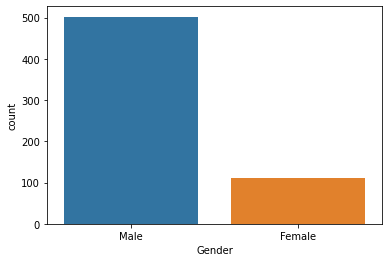

In [14]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

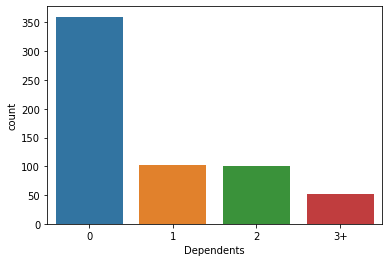

In [15]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='Married', ylabel='count'>

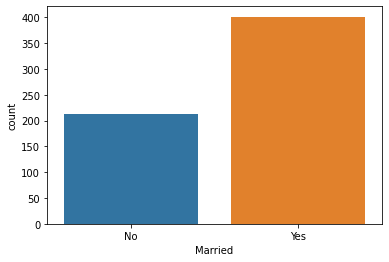

In [16]:
sns.countplot(df['Married'])

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

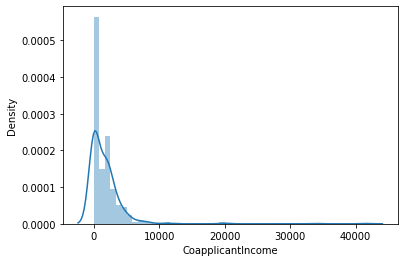

In [18]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

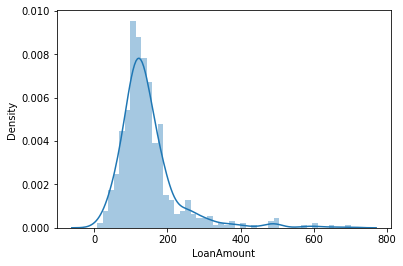

In [19]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

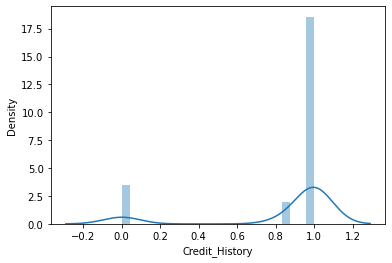

In [20]:
sns.distplot(df['Credit_History'])

In [21]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [23]:
# data transformation
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

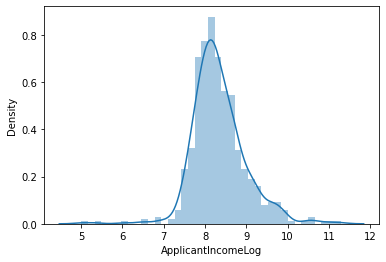

In [24]:
sns.distplot(df.ApplicantIncomeLog)

In [26]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
df['LoanAmountLog'] = np.log(df['LoanAmount'])
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
df['Total_Income_Log'] = np.log(df['Total_Income'])


In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [29]:
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog'], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [31]:
# handling categorical data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [33]:
d1 = pd.get_dummies(df['Gender'], drop_first= True)
d2 = pd.get_dummies(df['Married'], drop_first= True)
d3 = pd.get_dummies(df['Dependents'], drop_first= True)
d4 = pd.get_dummies(df['Education'], drop_first= True)
d5 = pd.get_dummies(df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(df['Property_Area'], drop_first= True)



df1 = pd.concat([df, d1, d2, d3, d4, d5, d6], axis = 1)
df=df1

df = df.drop(['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area'], axis=1)

In [34]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [35]:
df_test = pd.read_csv('test.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [36]:
df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].mean())
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mean())
df_test['Credit_History']=df_test['Credit_History'].fillna(df_test['Credit_History'].mean())

In [37]:
df_test['Gender']=df_test['Gender'].fillna(df_test['Gender'].mode()[0])
df_test['Married']=df_test['Married'].fillna(df_test['Married'].mode()[0])
df_test['Dependents']=df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Self_Employed']=df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])

In [38]:
df_test['Total_Income']=df_test['ApplicantIncome']+df_test['CoapplicantIncome']

In [40]:
df_test['ApplicantIncomeLog'] = np.log(df_test['ApplicantIncome'])

df_test['CoapplicantIncomeLog'] = np.log(df_test['CoapplicantIncome'])

df_test['LoanAmountLog'] = np.log(df_test['LoanAmount'])

df_test['Loan_Amount_Term_Log'] = np.log(df_test['Loan_Amount_Term'])

df_test['Total_Income_Log'] = np.log(df_test['Total_Income'])

In [42]:
df_test = df_test.drop(['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog'], axis=1)
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [43]:
t1 = pd.get_dummies(df_test['Gender'], drop_first= True)
t2 = pd.get_dummies(df_test['Married'], drop_first= True)
t3 = pd.get_dummies(df_test['Dependents'], drop_first= True)
t4 = pd.get_dummies(df_test['Education'], drop_first= True)
t5 = pd.get_dummies(df_test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(df_test['Property_Area'], drop_first= True)

In [44]:
df1 = pd.concat([df_test, t1, t2, t3, t4, t5, t6], axis = 1)
df_test=df1

In [46]:
df_test = df_test.drop(['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area'], axis=1)

In [47]:
df_test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


In [48]:
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [49]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,4.986426,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972466,4.262680,5.886104,7.972466,0,0,0,0,0,0,0,0,0
610,1.0,8.320205,3.688879,5.192957,8.320205,1,1,0,0,1,0,0,0,0
611,1.0,8.996157,5.533389,5.886104,9.025456,1,1,1,0,0,0,0,0,1
612,1.0,8.933664,5.231109,5.886104,8.933664,1,1,0,1,0,0,0,0,1


In [50]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=1)

In [53]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest,ypred))

In [54]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
ada =AdaBoostClassifier()
gb = GradientBoostingClassifier()

In [55]:
mymodel(logreg)

              precision    recall  f1-score   support

           N       0.90      0.39      0.54        49
           Y       0.77      0.98      0.87       105

    accuracy                           0.79       154
   macro avg       0.84      0.68      0.70       154
weighted avg       0.82      0.79      0.76       154



In [56]:
mymodel(knn)

              precision    recall  f1-score   support

           N       0.75      0.24      0.37        49
           Y       0.73      0.96      0.83       105

    accuracy                           0.73       154
   macro avg       0.74      0.60      0.60       154
weighted avg       0.74      0.73      0.68       154



In [57]:
mymodel(bg)

              precision    recall  f1-score   support

           N       0.63      0.49      0.55        49
           Y       0.78      0.87      0.82       105

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



In [58]:
mymodel(ada)

              precision    recall  f1-score   support

           N       0.78      0.43      0.55        49
           Y       0.78      0.94      0.85       105

    accuracy                           0.78       154
   macro avg       0.78      0.69      0.70       154
weighted avg       0.78      0.78      0.76       154



In [59]:
mymodel(gb)

              precision    recall  f1-score   support

           N       0.71      0.45      0.55        49
           Y       0.78      0.91      0.84       105

    accuracy                           0.77       154
   macro avg       0.75      0.68      0.70       154
weighted avg       0.76      0.77      0.75       154



In [61]:
mymodel(dt)

              precision    recall  f1-score   support

           N       0.57      0.55      0.56        49
           Y       0.79      0.81      0.80       105

    accuracy                           0.73       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.72      0.73      0.73       154



In [62]:
dt1 = DecisionTreeClassifier(max_depth=10)
mymodel(dt1)

              precision    recall  f1-score   support

           N       0.57      0.43      0.49        49
           Y       0.76      0.85      0.80       105

    accuracy                           0.71       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.70      0.71      0.70       154



In [63]:
for i in range(1,50):
    dt2 = DecisionTreeClassifier(criterion = 'gini',max_depth=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7922077922077922
 2 -: 0.7922077922077922
 3 -: 0.7792207792207793
 4 -: 0.7857142857142857
 5 -: 0.7857142857142857
 6 -: 0.7792207792207793
 7 -: 0.7727272727272727
 8 -: 0.7532467532467533
 9 -: 0.7467532467532467
 10 -: 0.7207792207792207
 11 -: 0.7597402597402597
 12 -: 0.7532467532467533
 13 -: 0.7272727272727273
 14 -: 0.7337662337662337
 15 -: 0.7337662337662337
 16 -: 0.7207792207792207
 17 -: 0.7077922077922078
 18 -: 0.7077922077922078
 19 -: 0.7337662337662337
 20 -: 0.7272727272727273
 21 -: 0.7272727272727273
 22 -: 0.7142857142857143
 23 -: 0.7142857142857143
 24 -: 0.7012987012987013
 25 -: 0.7402597402597403
 26 -: 0.7142857142857143
 27 -: 0.7337662337662337
 28 -: 0.7272727272727273
 29 -: 0.7337662337662337
 30 -: 0.7272727272727273
 31 -: 0.7142857142857143
 32 -: 0.7467532467532467
 33 -: 0.7337662337662337
 34 -: 0.7207792207792207
 35 -: 0.7272727272727273
 36 -: 0.7207792207792207
 37 -: 0.7272727272727273
 38 -: 0.7337662337662337
 39 -: 0.701298701298

In [64]:
dt3 = DecisionTreeClassifier(criterion = 'gini',max_depth=2)
mymodel(dt3)

              precision    recall  f1-score   support

           N       0.87      0.41      0.56        49
           Y       0.78      0.97      0.86       105

    accuracy                           0.79       154
   macro avg       0.82      0.69      0.71       154
weighted avg       0.81      0.79      0.77       154



In [65]:
dt4 = DecisionTreeClassifier(min_samples_leaf=4)
mymodel(dt4)

              precision    recall  f1-score   support

           N       0.61      0.51      0.56        49
           Y       0.79      0.85      0.82       105

    accuracy                           0.74       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



In [66]:
for i in range(1,50):
    dt5 = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=i)
    dt5.fit(xtrain, ytrain)
    ypred = dt5.predict(xtest)
    print(f" {i} -: {accuracy_score(ytest, ypred)}")

 1 -: 0.7207792207792207
 2 -: 0.7207792207792207
 3 -: 0.7337662337662337
 4 -: 0.7402597402597403
 5 -: 0.7142857142857143
 6 -: 0.7207792207792207
 7 -: 0.7337662337662337
 8 -: 0.7467532467532467
 9 -: 0.7597402597402597
 10 -: 0.7467532467532467
 11 -: 0.7532467532467533
 12 -: 0.7922077922077922
 13 -: 0.7727272727272727
 14 -: 0.7727272727272727
 15 -: 0.7402597402597403
 16 -: 0.7467532467532467
 17 -: 0.7467532467532467
 18 -: 0.7922077922077922
 19 -: 0.7792207792207793
 20 -: 0.7792207792207793
 21 -: 0.7922077922077922
 22 -: 0.7922077922077922
 23 -: 0.7532467532467533
 24 -: 0.7532467532467533
 25 -: 0.7532467532467533
 26 -: 0.7922077922077922
 27 -: 0.7922077922077922
 28 -: 0.7922077922077922
 29 -: 0.7922077922077922
 30 -: 0.7922077922077922
 31 -: 0.7922077922077922
 32 -: 0.7922077922077922
 33 -: 0.7922077922077922
 34 -: 0.7922077922077922
 35 -: 0.7922077922077922
 36 -: 0.7922077922077922
 37 -: 0.7922077922077922
 38 -: 0.7922077922077922
 39 -: 0.792207792207

In [67]:
dt4 = DecisionTreeClassifier(criterion = 'gini',min_samples_leaf=10)
mymodel(dt4)

              precision    recall  f1-score   support

           N       0.62      0.51      0.56        49
           Y       0.79      0.86      0.82       105

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



In [68]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print('Accuracy :',accuracy_score(ytest,ypred)*100)

Accuracy : 77.27272727272727


In [69]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)